<a href="https://colab.research.google.com/github/ibrahimbal43/ibrahim_bal-_Dsa210_project/blob/main/python_dsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# FIFA 23
path_fifa = kagglehub.dataset_download("stefanoleone992/fifa-23-complete-player-dataset")
print("FIFA path:", path_fifa)
print(os.listdir(path_fifa))




Using Colab cache for faster access to the 'fifa-23-complete-player-dataset' dataset.
FIFA path: /kaggle/input/fifa-23-complete-player-dataset
['male_players (legacy).csv', 'female_coaches.csv', 'male_teams.csv', 'female_players.csv', 'male_players.csv', 'female_players (legacy).csv', 'female_teams.csv', 'male_coaches.csv']


In [6]:


# 1) FIFA 23 dataset indirme
path_fifa = kagglehub.dataset_download("stefanoleone992/fifa-23-complete-player-dataset")
print("FIFA path:", path_fifa)
print(os.listdir(path_fifa))

# 2) FIFA male_players.csv dosyasını yükleme
use_cols = [
    "short_name", "long_name", "age",
    "height_cm", "weight_kg",
    "overall", "potential", "physic",
    "value_eur"
]

df_fifa = pd.read_csv(os.path.join(path_fifa, "male_players.csv"),
                      usecols=use_cols)

# ⬇⬇⬇ TAM BU SATIRA EKLE ⬇⬇⬇

df = df_fifa.copy()

# ⬆⬆⬆ Burası DOĞRU yer ⬆⬆⬆

# 3) Temizlik
df = df.dropna(subset=["value_eur", "height_cm", "weight_kg",
                       "potential", "overall", "physic"])

df = df[(df["height_cm"] > 0) & (df["weight_kg"] > 0)]

# 4) Feature engineering
df["market_value"] = df["value_eur"]
df["physical_index"] = df["height_cm"] * df["weight_kg"]
df["bmi"] = df["weight_kg"] / ((df["height_cm"]/100)**2)

df.head()


Using Colab cache for faster access to the 'fifa-23-complete-player-dataset' dataset.
FIFA path: /kaggle/input/fifa-23-complete-player-dataset
['male_players (legacy).csv', 'female_coaches.csv', 'male_teams.csv', 'female_players.csv', 'male_players.csv', 'female_players (legacy).csv', 'female_teams.csv', 'male_coaches.csv']


,short_name,long_name,overall,potential,value_eur,age,height_cm,weight_kg,physic,market_value,physical_index,bmi
0,L. Messi,Lionel Andrés Messi Cuccittini,91,91,54000000.0,35,169,67,64.0,54000000.0,11323,23.458562
1,K. Benzema,Karim Benzema,91,91,64000000.0,34,185,81,78.0,64000000.0,14985,23.666910
2,R. Lewandowski,Robert Lewandowski,91,91,84000000.0,33,185,81,83.0,84000000.0,14985,23.666910
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000.0,31,181,75,77.0,107500000.0,13575,22.893074
4,K. Mbappé,Kylian Mbappé Lottin,91,95,190500000.0,23,182,73,76.0,190500000.0,13286,22.038401


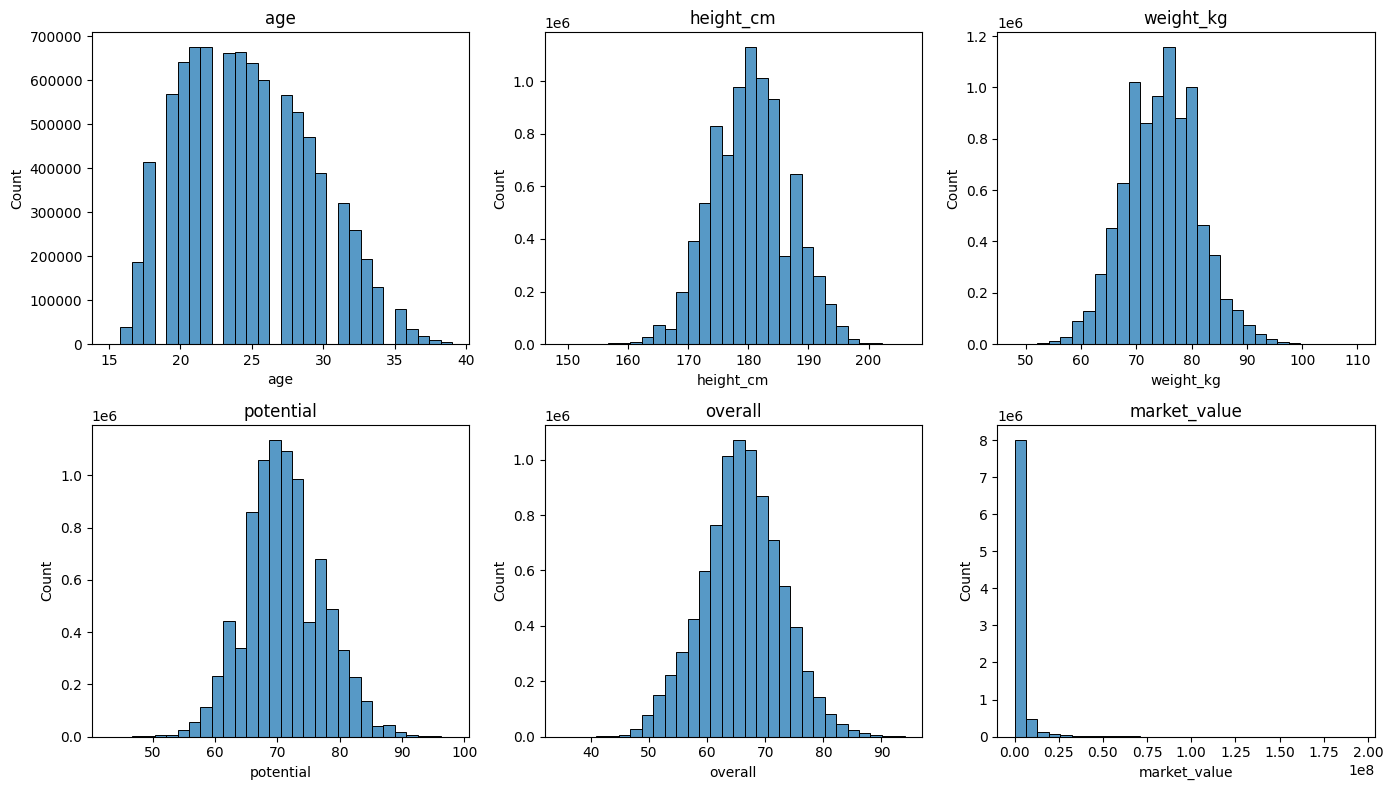

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["age", "height_cm", "weight_kg", "potential", "overall", "market_value"]
plt.figure(figsize=(14,8))
for i,c in enumerate(cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[c], bins=30)
    plt.title(c)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x=df["potential"], y=df["market_value"])
plt.title("Potential vs Market Value")

plt.subplot(2,2,2)
sns.scatterplot(x=df["overall"], y=df["market_value"])
plt.title("Overall vs Market Value")

plt.subplot(2,2,3)
sns.scatterplot(x=df["physical_index"], y=df["market_value"])
plt.title("Physical Index vs Market Value")

plt.subplot(2,2,4)
sns.scatterplot(x=df["bmi"], y=df["market_value"])
plt.title("BMI vs Market Value")

plt.tight_layout()
plt.show()


In [ ]:
corr = df[["age", "height_cm", "weight_kg", "physical_index",
           "bmi", "overall", "potential", "physic", "market_value"]].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


In [ ]:
from scipy.stats import pearsonr

r1, p1 = pearsonr(df["potential"], df["market_value"])
r2, p2 = pearsonr(df["physical_index"], df["market_value"])

print("Potential ↔ Value : r=%.3f p=%.5f" % (r1, p1))
print("PhysicalIndex ↔ Value : r=%.3f p=%.5f" % (r2, p2))


In [ ]:
import statsmodels.api as sm

X = df[["potential", "physical_index"]]
X = sm.add_constant(X)
y = df["market_value"]

model = sm.OLS(y, X).fit()
print(model.summary())


In [ ]:
print("Toplam oyuncu sayısı:", df.shape[0])
